In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_california_housing, load_iris, load_wine, load_diabetes
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, ShuffleSplit, validation_curve, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text


np.random.seed(306)
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [19]:
df = load_wine(as_frame=True)

X = df.data.to_numpy()
y = df.target.to_numpy()

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(178, 13) (178,)
(124, 13) (54, 13) (124,) (54,)


In [ ]:
# -- Use criterion as 'entropy' or 'gini'

# -- Use splitter as 'random' or 'best'

# -- Use minimum number of samples per leaf as [2,4,6,8,10]

# -- Use maximum depth as [3,4,5,6]

# -- Use cross validation = 4

# -- Train the 'model

In [26]:
tuned_parameters = {
    'criterion' : ['entropy', 'gini'],
    'splitter' : ['random', 'best'],
    'max_depth': [3,4,5,6], 
    'min_samples_leaf': [2,4,6,8,10]
}

clf_cv = GridSearchCV(DecisionTreeClassifier(random_state=1), tuned_parameters, cv=4)
clf_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']})

In [27]:
clf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [30]:
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=2, splitter="best", random_state=1)
clf2.fit(X_train, y_train)
print(clf2.score(X_test, y_test))

0.9074074074074074


In [55]:
df = load_diabetes(as_frame=True)

X = df.data.to_numpy()
y = df.target.to_numpy()

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(442, 10) (442,)
(309, 10) (133, 10) (309,) (133,)


In [ ]:
# -- Use criterion as 'squared_error'

# -- Use splitter as 'random'

# -- Use max_leaf_nodes= 10,

# -- Train the 'model' and compute the 'score' on training data and test data

In [44]:
reg = DecisionTreeRegressor(criterion="squared_error", splitter="random", max_leaf_nodes=10, random_state=1)
reg.fit(X_train, y_train)

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.5032060624566737
0.218771375137222


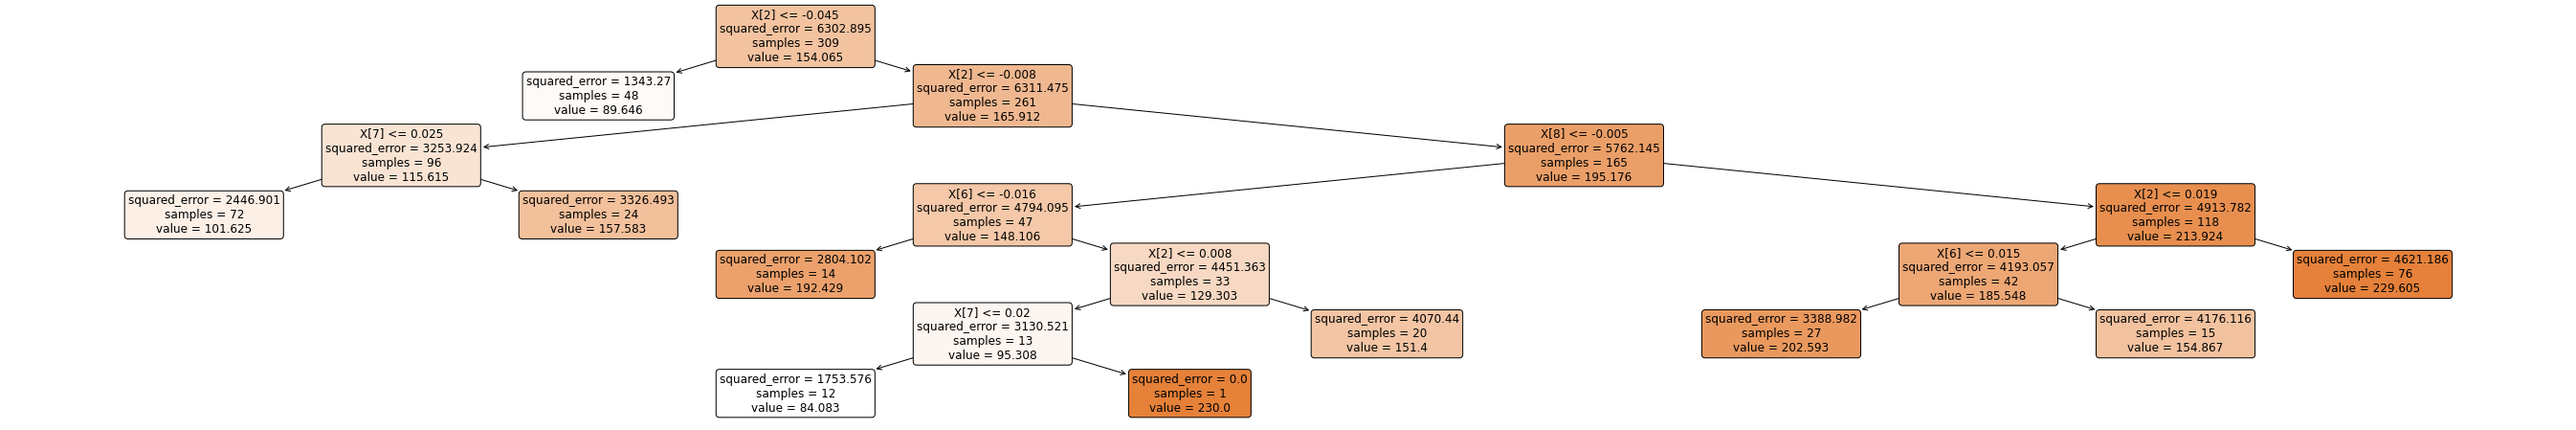

In [46]:
plt.figure(figsize=(48, 8), facecolor='w')
a = tree.plot_tree(reg, rounded=True, filled=True, fontsize=12)
plt.show()

In [ ]:
# Perform Hyperparameter tuning over the following parameters:

# -- Use criterion as ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']

# -- Use splitter as 'random' or 'best'

# -- Use max number of features as ['auto','sqrt', 'log2'],

# -- Use cost complexity pruning parameter as [0.001,0.01,0.02,0.05]

# -- Use cross validation = 4

In [56]:
tuned_parameters = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['random', 'best'],
    'max_features': ['auto','sqrt', 'log2'], 
    'ccp_alpha': [0.001,0.01,0.02,0.05]
}

reg_cv = GridSearchCV(DecisionTreeRegressor(max_depth = 4, random_state=1), tuned_parameters, cv=4)
reg_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(max_depth=4, random_state=1),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.02, 0.05],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']})

In [57]:
print(reg_cv.score(X_test, y_test))

0.10873445074064803


In [58]:
reg_cv.best_params_

{'ccp_alpha': 0.02,
 'criterion': 'absolute_error',
 'max_features': 'auto',
 'splitter': 'best'}